# Project: Wrangling and Analyze Data

In [86]:
import pandas as pd 
import numpy as np
import requests
import io
from io import StringIO
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [87]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [88]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [89]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv").text
image_prediction = pd.read_csv(io.StringIO(response),sep='\t')

In [90]:
image_prediction.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [91]:
#couldnot download this file from twitter API so i will read the file directly
tweet_json = pd.read_json('tweet-json',lines=True,encoding='utf-8')

In [92]:
tweet_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http:/

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [93]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1103,735256018284875776,NaN,NaN,2016-05-24 23:47:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kellogg. He accidentally opened the front facing camera. 8/10 get it together doggo https://t.co/MRYv7nDPyS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735256018284875776/photo/1,8,10,Kellogg,doggo,NaN,NaN,NaN
1267,709566166965075968,NaN,NaN,2016-03-15 02:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olaf. He's gotta be rare. Seems sturdy. Tail is floofy af. 12/10 would do whatever it takes to pet https://t.co/E9jaU59bh9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709566166965075968/photo/1,12,10,Olaf,NaN,NaN,NaN,NaN
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Curtis. He's a fluffball. 11/10 would snug this pupper https://t.co/1DzInODwrj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254459715584/photo/1,11,10,Curtis,NaN,NaN,pupper,NaN


In [94]:
#detecting the percentage of missed value in twitter_archive data
twitter_archive.isnull().sum()*100/len(twitter_archive)

tweet_id                       0.000000
in_reply_to_status_id         96.689304
in_reply_to_user_id           96.689304
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                          31.621392
doggo                         95.882852
floofer                       99.575552
pupper                        89.091681
puppo                         98.726655
dtype: float64

In [95]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [96]:
#checking the duplicated values
twitter_archive['tweet_id'].duplicated().sum()

np.int64(0)

In [97]:
#visualize the distribution of rating_numerator culomn and detecting outliers
numerator_fig = px.box(twitter_archive,'rating_numerator')
numerator_fig

In [98]:
#visualize the distribution of rating_denominator culomn and detecting outliers
denominator_fig = px.box(twitter_archive,'rating_denominator')
denominator_fig

In [99]:
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
311,671544874165002241,https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg,1,feather_boa,0.240858,False,wig,0.085946,False,wool,0.040674,False
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True


In [100]:
image_prediction.isnull().sum()*100/len(image_prediction)

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [101]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [102]:
tweet_json.sample(3)

created_at                  id              id_str  \
34   2017-07-13 15:19:09+00:00  885518971528720385  885518971528720384   
332  2017-02-18 01:03:09+00:00  832757312314028032  832757312314028032   
1693 2015-12-27 23:53:05+00:00  681261549936340994  681261549936340992   

                                                                                                                                                            full_text  \
34                                                                                            I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk   
332   This is Willow. She's the official strawberry taste tester. Palate delicate af. Currently noting the subtle piquancy of this one. 13/10 https://t.co/On7muWnWSQ   
1693                       Say hello to Panda. He's a Quackadilly Shooster. Not amused by your fake ball throwing motion. 9/10 would hug lots https://t.co/wL1iDvbcVk   

      truncated display_text_range  \
34        False            [0, 47]   
332       False           [0, 135]   
1693      False           [0, 138]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    entities  \
34                                                                                                                                                                                                                                                                                                                                                                                                                                                      {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/gzLHboL7Sk', 'expanded_url': 'https://twitter.com/4bonds2carbon/status/885517367337512960', 'display_url': 'twitter.com/4bonds2carbon/…', 'indices': [48, 71]}]}   
332   {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 832757300183994371, 'id_str': '832757300183994371', 'indices': [136, 159], 'media_url': 'http://pbs.twimg.com/media/C46MWjWUkAMB5tb.jpg', 'media_url_https': 'https://pbs.twimg.com/media/C46MWjWUkAMB5tb.jpg', 'url': 'https://t.co/On7muWnWSQ', 'display_url': 'pic.twitter.com/On7muWnWSQ', 'expanded_url': 'https://twitter.com/dog_rates/status/832757312314028032/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1153, 'h': 2048, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 676, 'h': 1200, 'resize': 'fit'}}}]}   
1693    {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 681261544890576896, 'id_str': '681261544890576896', 'indices': [115, 138], 'media_url': 'http://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg', 'url': 'https://t.co/wL1iDvbcVk', 'display_url': 'pic.twitter.com/wL1iDvbcVk', 'expanded_url': 'https://twitter.com/dog_rates/status/681261549936340994/photo/1', 'type': 'photo', 'sizes': {'small': {'w': 340, 'h': 456, 'resize': 'fit'}, 'medium': {'w': 600, 'h': 804, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 764, 'h': 1024, 'resize': 'fit'}}}]}   

                                                                                                                                            

In [103]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [104]:
tweet_json.isnull().sum()*100/len(tweet_json)

created_at                         0.000000
id                                 0.000000
id_str                             0.000000
full_text                          0.000000
truncated                          0.000000
display_text_range                 0.000000
entities                           0.000000
extended_entities                 11.937128
source                             0.000000
in_reply_to_status_id             96.686491
in_reply_to_status_id_str         96.686491
in_reply_to_user_id               96.686491
in_reply_to_user_id_str           96.686491
in_reply_to_screen_name           96.686491
user                               0.000000
geo                              100.000000
coordinates                      100.000000
place                             99.957519
contributors                     100.000000
is_quote_status                    0.000000
retweet_count                      0.000000
favorite_count                     0.000000
favorited                       

In [105]:
tweet_json['id'].duplicated().sum()

np.int64(0)

### Quality issues
1. Columns `in_reply_to_status_id`,`entities`,`in_reply_to_status_id_str`,`in_reply_to_user_id_str`,`in_reply_to_screen_name`,`in_reply_to_user_id`,`name`,`doggo`,`floofer`,`pupper`,`puppo`,`geo`,`coordinates`,`place`,`contributors`,`quoted_status`,`quoted_status_id`,`quoted_status_id_str`,`possibly_sensitive`,`possibly_sensitive_appealable` have a large number of missed data

2. `timestamp`column includes timezone information(+0000),`created_at`column in tweet-json data contains(+00:00)

3. Columns `retweeted_status`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`id_str	`,`retweeted`,`retweeted_count` are a retweeted data(duplicates) and have a large numberof missed data

4. `source`column contains HTML tages 

5. There are alot of outliers in columns `rating_numerator`,`rating_denominator`

6. In tweet-json data change `id` column to `tweet_id`

7. invalid data type in `timestamp`column

8. In twitter_archive data cells of `text`column have links at the end of it

9. In twitter_archive data we need to remove any raws which starting with (RT @) in `text` column 

### Tidiness issues
1. Columns `rating_numerator` and `rating_denominator`are separated from each other istead of being in one column called rating

2. Columns `doggo`,`floofer`,`pupper`,`puppo` are separated from each other

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [106]:
# Make copies of original pieces of data
df1 = twitter_archive.copy()
df2 = image_prediction.copy()
df3 = tweet_json.copy()

In [107]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [108]:
df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [109]:
df3.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

### Issue #1:Columns `in_reply_to_status_id`,`entities`,`in_reply_to_status_id`,`in_reply_to_user_id_str`,`in_reply_to_screen_name`,`in_reply_to_user_id`,`doggo`,`floofer`,`pupper`,`puppo`,`geo`,`coordinates`,`place`,`contributors`,`quoted_status`,`quoted_status_id`,`quoted_status_id_str` have a large number of missed data


#### Define: Most of these columns have a great number of missed data (more than 90%),so we need to drop all of these columns

#### Code

In [110]:
#dropping column with large number of missed data in twitter_archive data
twitter_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [111]:
#dropping columns with large number of missed data in tweet_json data
tweet_json.drop(columns=['entities','in_reply_to_user_id_str','in_reply_to_screen_name','geo','coordinates','place','contributors','quoted_status','quoted_status_id','quoted_status_id_str','extended_entities','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','retweeted','retweet_count','possibly_sensitive','possibly_sensitive_appealable'],axis=1,inplace=True)

#### Test

In [112]:
twitter_archive.isnull().sum()*100/len(twitter_archive)

tweet_id                       0.000000
timestamp                      0.000000
source                         0.000000
text                           0.000000
retweeted_status_id           92.317487
retweeted_status_user_id      92.317487
retweeted_status_timestamp    92.317487
expanded_urls                  2.504244
rating_numerator               0.000000
rating_denominator             0.000000
name                          31.621392
dtype: float64

In [113]:
tweet_json.isnull().sum()*100/len(tweet_json)

created_at             0.000000
id                     0.000000
id_str                 0.000000
full_text              0.000000
truncated              0.000000
display_text_range     0.000000
source                 0.000000
user                   0.000000
is_quote_status        0.000000
favorite_count         0.000000
favorited              0.000000
lang                   0.000000
retweeted_status      92.395922
dtype: float64

### Issue #2:Columns `retweeted_status`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`id_str` are a retweeted data(duplicates) and have a large number of missed data

#### Define these columns is considered as a duplicated data so we need to drop them all and drop all null values

#### Code

In [114]:
#dropping duplicated columns and all null values in twitter_archive data
twitter_archive.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)
twitter_archive.dropna(inplace=True)

In [115]:
#dropping duplicated columns and all null values in tweet_json data
tweet_json.drop(columns=['retweeted_status','id_str'],axis=1,inplace=True)
tweet_json.dropna(inplace=True)

#### Test

In [116]:
twitter_archive.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
dtype: int64

In [117]:
tweet_json.isnull().sum()

created_at            0
id                    0
full_text             0
truncated             0
display_text_range    0
source                0
user                  0
is_quote_status       0
favorite_count        0
favorited             0
lang                  0
dtype: int64

### Issue #3:`timestamp`column includes timezone information(+0000),`created_at`column in tweet-json data contains(+00:00),invalid data type in `timestamp`column


#### Define:this (+0000) is irrelevant data in `timestamp`column so we should filter it and drop `created_at`column because it has the same data of `timeatamp`column

#### Code

In [118]:
#changing the datatype and removing (+0000) in timestamp column in twitter_archive data
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp']).dt.strftime('%y-%m-%d %H:%M:%S')

In [119]:
#removing (+00:00) in created_at column in tweet_json data
tweet_json['created_at'] = tweet_json['created_at'].dt.strftime('%y-%m-%d %H:%M:%S')

In [120]:
#droping created_at column because it has the same data of timestamp column(duplicated)
tweet_json.drop(columns=['created_at'],axis=1,inplace=True)

#### Test

In [121]:
twitter_archive['timestamp'].head()

0    17-08-01 16:23:56
1    17-08-01 00:17:27
2    17-07-31 00:18:03
3    17-07-30 15:58:51
4    17-07-29 16:00:24
Name: timestamp, dtype: object

### Issue #4:Invalid data type in `timestamp` column

#### Define:in twitter_archive data the data type of timestamp column is object after removing(+0000),so we need to change the data type to_datetime

#### Code

In [122]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

C:\Users\MSi\AppData\Local\Temp\ipykernel_10608\735881653.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



#### Test

In [123]:
twitter_archive['timestamp'].dtypes

dtype('<M8[ns]')

In [124]:
twitter_archive['timestamp'].info()

<class 'pandas.core.series.Series'>
Index: 1611 entries, 0 to 2354
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
1611 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 25.2 KB


### Issue #5:`source`column contains HTML tages

#### Define:source column contains<a href ="link">

#### Code

In [125]:
#removing HTML tages from source column in twitter_archive data
twitter_archive['source'] = twitter_archive['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').text)

In [126]:
#removing HTML tages from source column in tweet_json
tweet_json['source'] = tweet_json['source'].apply(lambda x:BeautifulSoup(x,'html.parser').text)

In [127]:
#droping any source column from any of the two data sets because it has the same data(duplicates)
tweet_json.drop(columns=['source'],axis=1,inplace=True)

#### Test

In [128]:
twitter_archive['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2349    Twitter for iPhone
2350    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
Name: source, Length: 1611, dtype: object

In [129]:
twitter_archive['source'].value_counts()

source
Twitter for iPhone     1536
Vine - Make a Scene      45
Twitter Web Client       20
TweetDeck                10
Name: count, dtype: int64

### Issue #6:There are alot of outliers in columns `rating_numerator`,`rating_denominator`

#### Define:We should remove all outliers in colums  `rating_numerator`,`rating_denominator` to get accurate rate 

#### Code

In [130]:
#defining a function to remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return filtered_data

In [131]:
#removing outliers from rating_denominator column
twitter_archive = remove_outliers(twitter_archive,'rating_denominator')

In [132]:
#removing outliers from rating_numerator column
twitter_archive = remove_outliers(twitter_archive,'rating_numerator')

#### Test

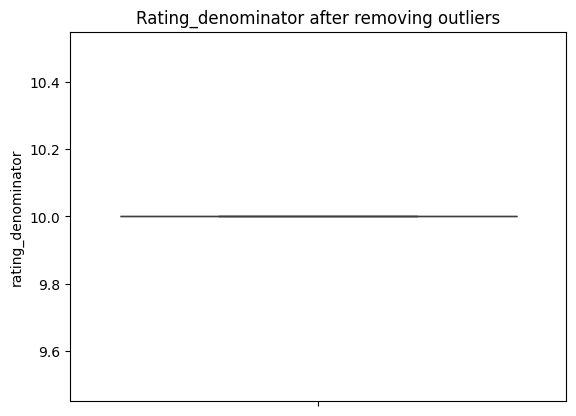

In [133]:
sns.boxplot(twitter_archive['rating_denominator'] )
plt.title("Rating_denominator after removing outliers")
plt.show()

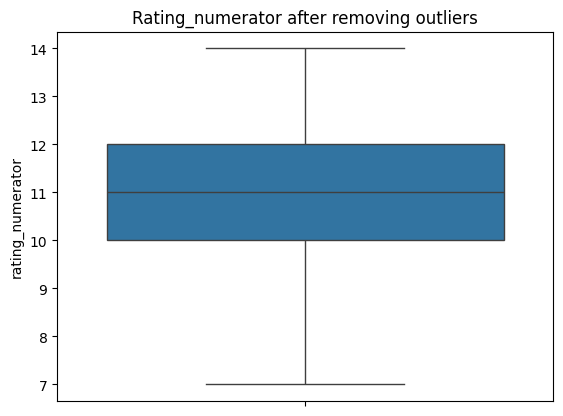

In [134]:
sns.boxplot(twitter_archive['rating_numerator'] )
plt.title("Rating_numerator after removing outliers")
plt.show()

### Issue #7:In tweet-json data change `id` column to `tweet_id`

#### Define: in tweet_json data-set the column `id `is equal to the column `tweet_id`in twitter_archive data-set so i will change the name of column`id` to 'tweet_id' to unify this column name between the three data sets

#### Code

In [135]:
tweet_json.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [136]:
tweet_json.columns

Index(['tweet_id', 'full_text', 'truncated', 'display_text_range', 'user',
       'is_quote_status', 'favorite_count', 'favorited', 'lang'],
      dtype='object')

In [137]:
tweet_json['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

### Issue #8:In twitter_archive data cells of `text`column have links at the end of it

#### Define: In twitter_archive data cells of `text`column have links at the end of it , and this links are the same links founded in `expanded_urls` column so we should remove these links

#### Code

In [138]:
#removing links from text column
twitter_archive['text'] = twitter_archive['text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', str(x), flags=re.MULTILINE))

#### Test

In [139]:
pd.set_option('display.max_colwidth',None)
twitter_archive['text'].head(5)

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

### Issue #9:In twitter_archive data we need to remove any raws which starting with (RT @) in `text` column 

#### Define:In twitter_archive data we need to remove any raws which starting with (RT @) in `text` column , because this is considered as a duplicated data(retweeted)

#### Code

In [140]:
#removing retweeted raws
twitter_archive = twitter_archive[~twitter_archive['text'].str.startswith('RT @')]

#### Test

In [141]:
twitter_archive['text'].head(5)

0                                                         This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2                     This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 
3                                                               This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us 
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

### Issue #10:Columns `rating_numerator` and `rating_denominator`are separated from each other

#### Define:Columns `rating_numerator` and `rating_denominator`are separated from each other istead of being in one column called rating

#### Code

In [142]:
twitter_archive['rating'] = twitter_archive['rating_numerator']/twitter_archive['rating_denominator']

In [143]:
#i will drop columns:rating_numerator and rating_denominator because i willnot use it anymore
twitter_archive.drop(columns=['rating_numerator','rating_denominator'],axis=1,inplace=True)

#### Test

In [144]:
twitter_archive.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating'],
      dtype='object')

In [145]:
twitter_archive['rating']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2347    0.9
2348    1.0
2350    1.0
2353    0.9
2354    0.7
Name: rating, Length: 1428, dtype: float64

### Issue #11:Columns `doggo`,`floofer`,`pupper`,`puppo` are separated from each other

#### Define:Columns `doggo`,`floofer`,`pupper`,`puppo` are separated from each other instead of being one column called 'dog_kind'

#### Code

In [146]:
#making a copy of uncleaned twitter_archive because i dropped doggo,floofer,pupper,puppo columns from the clened one
twitter_archive_copy = df1.copy()

In [147]:
# Combine dog types into 'dog_kind' column
twitter_archive["dog_kind"] = twitter_archive_copy[["doggo", "floofer", "pupper", "puppo"]].apply(
    lambda row: ' '.join(row.dropna().astype(str)), axis=1
)
# Replace empty strings with NaN
twitter_archive["dog_kind"] = twitter_archive["dog_kind"].replace("", pd.NA)

#### Test

In [148]:
twitter_archive['dog_kind'].value_counts()

dog_kind
pupper          129
doggo            40
puppo            16
floofer           5
doggo pupper      5
Name: count, dtype: int64

In [149]:
#checking missed values
twitter_archive.isnull().sum()

tweet_id            0
timestamp           0
source              0
text                0
expanded_urls       0
name                0
rating              0
dog_kind         1233
dtype: int64

In [150]:
#drop all missed data
twitter_archive.dropna(inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [151]:
twitter_archive_master = twitter_archive.merge(image_prediction,on="tweet_id").merge(tweet_json,on="tweet_id")
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [152]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating', 'dog_kind', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'full_text',
       'truncated', 'display_text_range', 'user', 'is_quote_status',
       'favorite_count', 'favorited', 'lang'],
      dtype='object')

In [153]:
twitter_archive_master.describe()

,tweet_id,timestamp,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count
count,1.860000e+02,186,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,7.501192e+17,2014-03-08 00:24:11.069892608,1.093548,1.295699,0.626182,0.133118,0.053739,10347.591398
min,6.721600e+17,2001-02-17 17:44:55,0.700000,1.000000,0.059033,0.000014,0.000006,693.000000
25%,6.860521e+17,2006-08-23 18:39:29.500000,1.000000,1.000000,0.399492,0.040102,0.011896,2716.500000
50%,7.390718e+17,2012-06-01 08:53:26.500000,1.100000,1.000000,0.661380,0.107893,0.039368,5592.500000
75%,8.126694e+17,2021-04-30 23:00:35.249999872,1.200000,1.000000,0.869449,0.199460,0.083605,12920.250000
max,8.902403e+17,2031-12-16 00:08:17,1.400000,4.000000,0.999962,0.467678,0.245653,106827.000000
std,6.778340e+16,NaN,0.165583,0.700334,0.272553,0.110082,0.050055,13518.852320


In [154]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            186 non-null    int64         
 1   timestamp           186 non-null    datetime64[ns]
 2   source              186 non-null    object        
 3   text                186 non-null    object        
 4   expanded_urls       186 non-null    object        
 5   name                186 non-null    object        
 6   rating              186 non-null    float64       
 7   dog_kind            186 non-null    object        
 8   jpg_url             186 non-null    object        
 9   img_num             186 non-null    int64         
 10  p1                  186 non-null    object        
 11  p1_conf             186 non-null    float64       
 12  p1_dog              186 non-null    bool          
 13  p2                  186 non-null    object        

### Insights:
1. The most common and loved dog kind is pupper

2. The most common rating is 1.2 , the most common source is Twitter for iphone

3. Tweet frequency over year

#### Insight 1 : the most common dog kind

In [155]:
twitter_archive_master['dog_kind'].value_counts()

dog_kind
pupper          123
doggo            38
puppo            15
floofer           5
doggo pupper      5
Name: count, dtype: int64

In [156]:
#relation between total favorite_count and dog_kind
most_favorite_dog_kind = twitter_archive_master.groupby('dog_kind')['favorite_count'].sum()
most_favorite_dog_kind

dog_kind
doggo           713377
doggo pupper     46590
floofer          47795
pupper          929064
puppo           187826
Name: favorite_count, dtype: int64

#### Insight 2 : most common sources and most common rating

In [157]:
twitter_archive_master['source'].value_counts()

source
Twitter for iPhone    185
TweetDeck               1
Name: count, dtype: int64

In [158]:
#the most rated dog_kinds based on total rating
most_rated_kind = twitter_archive_master.groupby('dog_kind')['rating'].sum()
most_rated_kind

dog_kind
doggo            45.9
doggo pupper      5.9
floofer           5.8
pupper          128.1
puppo            17.7
Name: rating, dtype: float64

In [159]:
twitter_archive_master['rating'].value_counts()
#the most popular rating is 1.2

rating
1.1    43
1.2    42
1.0    40
1.3    19
0.9    14
1.4    11
0.8    11
0.7     6
Name: count, dtype: int64

### insight 3 : tweet frequency over years

In [160]:
twitter_archive_master['year'] = twitter_archive_master['timestamp'].dt.year#creating a new column called year
tweets_per_years = twitter_archive_master['year'].value_counts().sort_index()
tweets_per_years

year
2001     5
2002     9
2003    11
2004     8
2005    11
2006     6
2007    11
2008    10
2009     7
2010     4
2011     9
2012     4
2013     6
2014     4
2015     6
2016     7
2017     3
2018     5
2019     4
2020     7
2021     4
2022     3
2023     5
2024     8
2025     6
2026     2
2027     3
2028     5
2029     6
2030     2
2031     5
Name: count, dtype: int64

### Visualization

In [161]:
#the most common dog_kind
px.histogram(twitter_archive_master['dog_kind'])

In [162]:
#converting the relation of favorite_counts and dog_kind to dataframe 
dog_kinds = ['doggo','doggopupper','floofer','pupper','puppo']
favorites = [713377,46590,47795,929064,187826]
most_loved = pd.DataFrame({'dog_kinds':dog_kinds,'favorites':favorites})

In [163]:
#most loved dog_kinds
fig0 = px.pie(most_loved, values='favorites', names='dog_kinds', title='Most loved dog kinds')
fig0.show()

In [164]:
#most rated dog_kind
px.bar(most_rated_kind)

In [165]:
#converting source data to data frame to be visualized as pie chart
sources = ['Twitter for iPhone','TweetDeck']
counts = [185, 1]
most_source = pd.DataFrame({'source': sources, 'count': counts})

In [166]:
# Create pie chart
#most common tweets sources
fig = px.pie(most_source, values='count', names='source', title='Most Common Tweet Sources')
fig.show()

In [167]:
#visualizing the distribution of tweets over years
px.bar(tweets_per_years)